# Multiple Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
# Get the data
# dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
# train_dataset, test_dataset = dataset['train'], dataset['test']
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'].take(4000), dataset['test'].take(1000)


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/subwords8k/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Uses `tfds.deprecated.text.SubwordTextEncoder` with 8k vocab size
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='/home/yunshu/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0',
    download_size=80.23 MiB,
    dataset_size=54.72 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    supervised_keys=('text', 'label'),
    splits={
        'te

In [6]:
BUFFER_SIZE = 100
BATCH_SIZE = 100

train_dataset = train_dataset.shuffle(BUFFER_SIZE).take(1000)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_dataset.padded_batch(BATCH_SIZE).take(1000)

In [7]:
vocab_size = 1000
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 8),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 8)           65480     
_________________________________________________________________
bidirectional (Bidirectional (None, None, 16)          1088      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 16)                1600      
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 68,457
Trainable params: 68,457
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
10/10 [==============================] - 13s 975ms/step - loss: 0.6932 - accuracy: 0.4875 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 2/10
10/10 [==============================] - 7s 738ms/step - loss: 0.6921 - accuracy: 0.5104 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 3/10
10/10 [==============================] - 7s 776ms/step - loss: 0.6902 - accuracy: 0.5088 - val_loss: 0.6929 - val_accuracy: 0.4970
Epoch 4/10
10/10 [==============================] - 7s 740ms/step - loss: 0.6853 - accuracy: 0.5119 - val_loss: 0.6915 - val_accuracy: 0.4970
Epoch 5/10
10/10 [==============================] - 7s 732ms/step - loss: 0.6717 - accuracy: 0.5249 - val_loss: 0.6869 - val_accuracy: 0.5120
Epoch 6/10
10/10 [==============================] - 7s 725ms/step - loss: 0.6245 - accuracy: 0.6617 - val_loss: 0.6652 - val_accuracy: 0.6010
Epoch 7/10
10/10 [==============================] - 7s 754ms/step - loss: 0.5250 - accuracy: 0.8814 - val_loss: 0.6589 - val_accuracy: 0.6580
Epoch

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

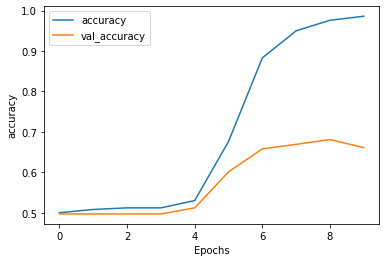

In [12]:
plot_graphs(history, 'accuracy')

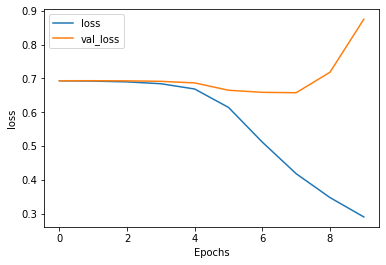

In [13]:
plot_graphs(history, 'loss')